In [1]:
#!pip install seaborn

In [2]:
#!pip install openpyxl

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy                 as np
import geopandas             as gpd
import seaborn               as sns
import folium  #needed for interactive map
from folium.plugins import HeatMap
#%matplotlib inline
sns.set()

# Carga geojson

In [4]:
# file_path= 'D:/JUAN CAMILO/DS4A/Proyecto FInal/locashp/Loca.shp'
# file_path2='D:/JUAN CAMILO/DS4A/Proyecto FInal/Bases de Datos/Bases_limpias/6. Base de datos Delitos Bogota 2019_2021_Clean.csv'

filepath_Localidades = '../Mapas/poligonos-localidades.shp'
filepath_Delitos = '../Datasets Clean/6. Base de datos Delitos Bogota 2019_2021_Clean.csv'

In [5]:
MapaLocalidades = gpd.read_file(filepath_Localidades)
MapaLocalidades

,Nombre_de_l,Acto_admini,Area_de_la_,Identificad,geometry
0,SANTA FE,Acuerdo 117 de 2003,"45170645,863322",03,"POLYGON ((-73.99446 4.61425, -73.99446 4.61425..."
1,BARRIOS UNIDOS,Acuerdo 8 de 1977,"11903448,204872",12,"POLYGON ((-74.05725 4.68684, -74.06249 4.65594..."
2,FONTIBON,Acuerdo 8 de 1977,"33281002,494914",09,"POLYGON ((-74.10342 4.65351, -74.10750 4.64823..."
3,ENGATIVA,Acuerdo 8 de 1977,"35880967,349154",10,"POLYGON ((-74.15547 4.71798, -74.15547 4.71798..."
4,CANDELARIA,Acuerdo 117 de 2003,"2060242,920452",17,"POLYGON ((-74.06621 4.60317, -74.06620 4.60317..."
5,CHAPINERO,Acuerdo 8 de 1977,"38155857,205938",02,"POLYGON ((-74.01089 4.66358, -74.01104 4.66359..."
6,CIUDAD BOLIVAR,Acuerdo 14 de 1983,"130002593,080624",19,"POLYGON ((-74.18135 4.58892, -74.18162 4.58944..."
7,SUBA,Acuerdo 8 de 1977,"100560477,718254",11,"POLYGON ((-74.03450 4.82547, -74.03478 4.82418..."
8,RAFAEL URIBE URIBE,Acuerdo 117 de 2003,"13834084,806513",18,"POLYGON ((-74.12803 4.59254, -74.12777 4.59233..."
9,KENNEDY,Acuerdo 8 de 1977,"38589733,814235",08,"POLYGON ((-74.11830 4.63741, -74.11845 4.63727..."


In [6]:
dic_Localidades={'TEUSAQUILLO':'Teusaquillo',
                'USAQUEN':'Usaquén',
                'CHAPINERO':'Chapinero',
                'SANTA FE':'Santa Fe',
                'SAN CRISTOBAL':'San Cristobal',
                'USME':'Usme',
                'TUNJUELITO':'Tunjuelito',
                'BOSA':'Bosa',
                'KENNEDY':'Kennedy',
                'FONTIBON':'Fontibón',
                'ENGATIVA':'Engativá',
                'SUBA':'Suba',
                'BARRIOS UNIDOS':'Barrios Unidos',
                'TEUSAQUILLO':'Teusaquillo',
                'LOS MARTIRES':'Los Mártires',
                'ANTONIO NARIÑO':'Antonio Nariño',
                'ANTONIO NARIÃO':'Antonio Nariño',
                'PUENTE ARANDA':'Puente Aranda',
                'CANDELARIA':'La Candelaria',
                'RAFAEL URIBE URIBE':'Rafael Uribe Uribe',
                'CIUDAD BOLIVAR':'Ciudad Bolivar',
                'SUMAPAZ':'Sumapaz'
}

In [7]:
Colsdict = {'Nombre_de_l' : 'Localidad', 'Acto_admini' : 'Acto_Administrativo',
            'Area_de_la_' : 'Area', 'Identificad' : 'ID_Number'}

MapaLocalidades.rename(columns=Colsdict,inplace = True)

MapaLocalidades['Localidad']=MapaLocalidades['Localidad'].replace(dic_Localidades)
#MapaLocalidades['geometry2']=MapaLocalidades['geometry']
MapaLocalidades

,Localidad,Acto_Administrativo,Area,ID_Number,geometry
0,Santa Fe,Acuerdo 117 de 2003,"45170645,863322",03,"POLYGON ((-73.99446 4.61425, -73.99446 4.61425..."
1,Barrios Unidos,Acuerdo 8 de 1977,"11903448,204872",12,"POLYGON ((-74.05725 4.68684, -74.06249 4.65594..."
2,Fontibón,Acuerdo 8 de 1977,"33281002,494914",09,"POLYGON ((-74.10342 4.65351, -74.10750 4.64823..."
3,Engativá,Acuerdo 8 de 1977,"35880967,349154",10,"POLYGON ((-74.15547 4.71798, -74.15547 4.71798..."
4,La Candelaria,Acuerdo 117 de 2003,"2060242,920452",17,"POLYGON ((-74.06621 4.60317, -74.06620 4.60317..."
5,Chapinero,Acuerdo 8 de 1977,"38155857,205938",02,"POLYGON ((-74.01089 4.66358, -74.01104 4.66359..."
6,Ciudad Bolivar,Acuerdo 14 de 1983,"130002593,080624",19,"POLYGON ((-74.18135 4.58892, -74.18162 4.58944..."
7,Suba,Acuerdo 8 de 1977,"100560477,718254",11,"POLYGON ((-74.03450 4.82547, -74.03478 4.82418..."
8,Rafael Uribe Uribe,Acuerdo 117 de 2003,"13834084,806513",18,"POLYGON ((-74.12803 4.59254, -74.12777 4.59233..."
9,Kennedy,Acuerdo 8 de 1977,"38589733,814235",08,"POLYGON ((-74.11830 4.63741, -74.11845 4.63727..."


<AxesSubplot:>

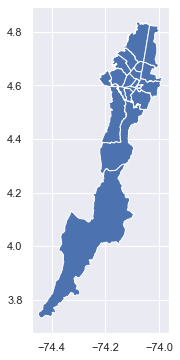

In [8]:
MapaLocalidades.plot(figsize=(12,6))

# Carga base TM

In [9]:
df_crimes = pd.read_csv(filepath_Delitos)
df_crimes

,JURISMETROPOLITANADEPTO,MUNICIPIO_HECHO,COMUNAS_ZONAS_DESCRIPCION,DESCRIPCION_CONDUCTA,BARRIOS_HECHO,FECHA_HECHO,MES_LARGO,DIA_SEMANA,INTERVALOS_HORA,HORA_HECHO,...,EDAD,AGRUPA_EDAD_PERSONA,GRADO_INSTRUCCION_PERSONA,JURISESTACIONAREA,JURISCAI,MES,ANIO,DIA,LATITUD_Y,LONGITUD_X
0,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 93 LAS NIEVES ENO REPORTADO3,ARTÍCULO 239. HURTO PERSONAS,VERACRUZ ENO REPORTADO3,9/8/2019,Agosto,Viernes,18:00 NO REPORTADO 23:59,9:30:00 p. m.,...,19,ADULTOS,SECUNDARIA,ESTACION ENO REPORTADO03 SANTA FE,CAI COLSEGUROS ENO REPORTADO3,8,2019,9,"4,601635086","-74,06970504"
1,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 94 LA CANDELARIA ENO REPORTADO17,ARTÍCULO 239. HURTO PERSONAS,LA CATEDRAL ENO REPORTADO17,1/4/2019,Abril,Lunes,18:00 NO REPORTADO 23:59,8:30:00 p. m.,...,20,ADULTOS,SUPERIOR,ESTACION ENO REPORTADO17 CANDELARIA,CAI ROSARIO ENO REPORTADO17,4,2019,1,"4,598116278","-74,07485298"
2,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 94 LA CANDELARIA ENO REPORTADO17,ARTÍCULO 239. HURTO PERSONAS,CANDELARIA ENO REPORTADO17,9/8/2019,Agosto,Viernes,00:00 NO REPORTADO 05:59,5:00:00 a. m.,...,20,ADULTOS,SECUNDARIA,ESTACION ENO REPORTADO17 CANDELARIA,CAI ROSARIO ENO REPORTADO17,8,2019,9,"4,596988418","-74,06957093"
3,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 94 LA CANDELARIA ENO REPORTADO17,ARTÍCULO 239. HURTO PERSONAS,LA CONCORDIA ENO REPORTADO17,9/8/2019,Agosto,Viernes,18:00 NO REPORTADO 23:59,9:00:00 p. m.,...,20,ADULTOS,SUPERIOR,ESTACION ENO REPORTADO17 CANDELARIA,CAI ROSARIO ENO REPORTADO17,8,2019,9,"4,596988418","-74,06957093"
4,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 94 LA CANDELARIA ENO REPORTADO17,ARTÍCULO 239. HURTO PERSONAS,CANDELARIA ENO REPORTADO17,17/1/2019,Enero,Jueves,12:00 NO REPORTADO 17:59,4:30:00 p. m.,...,21,ADULTOS,SUPERIOR,ESTACION ENO REPORTADO17 CANDELARIA,CAI BOLIVIA ENO REPORTADO17,1,2019,17,"4,595336143","-74,07260719"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 94 LA CANDELARIA ENO REPORTADO17,ARTÍCULO 239. HURTO PERSONAS,LA CATEDRAL ENO REPORTADO17,27/2/2020,Febrero,Jueves,12:00 NO REPORTADO 17:59,2:00:00 p. m.,...,63,ADULTOS,SUPERIOR,ESTACION ENO REPORTADO17 CANDELARIA,CAI ROSARIO ENO REPORTADO17,2,2020,27,"4,600776481","-74,07256773"
173,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 94 LA CANDELARIA ENO REPORTADO17,ARTÍCULO 239. HURTO PERSONAS,LA CATEDRAL ENO REPORTADO17,24/1/2020,Enero,Viernes,12:00 NO REPORTADO 17:59,1:00:00 p. m.,...,64,ADULTOS,SUPERIOR,ESTACION ENO REPORTADO17 CANDELARIA,CAI ROSARIO ENO REPORTADO17,1,2020,24,"4,598116278","-74,07485298"
174,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 93 LAS NIEVES ENO REPORTADO3,ARTÍCULO 239. HURTO PERSONAS,VERACRUZ ENO REPORTADO3,19/2/2019,Febrero,Martes,12:00 NO REPORTADO 17:59,2:00:00 p. m.,...,64,ADULTOS,SUPERIOR,ESTACION ENO REPORTADO03 SANTA FE,CAI COLSEGUROS ENO REPORTADO3,2,2019,19,"4,601201969","-74,07028172"
175,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 94 LA CANDELARIA ENO REPORTADO17,ARTÍCULO 239. HURTO PERSONAS,LAS AGUAS ENO REPORTADO17,28/4/2019,Abril,Domingo,12:00 NO REPORTADO 17:59,3:00:00 p. m.,...,64,ADULTOS,SUPERIOR,ESTACION ENO REPORTADO17 CANDELARIA,CAI ROSARIO ENO REPORTADO17,4,2019,28,"4,599704771","-74,0686268"


In [10]:
df_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   JURISMETROPOLITANADEPTO    177 non-null    object
 1   MUNICIPIO_HECHO            177 non-null    object
 2   COMUNAS_ZONAS_DESCRIPCION  177 non-null    object
 3   DESCRIPCION_CONDUCTA       177 non-null    object
 4   BARRIOS_HECHO              177 non-null    object
 5   FECHA_HECHO                177 non-null    object
 6   MES_LARGO                  177 non-null    object
 7   DIA_SEMANA                 177 non-null    object
 8   INTERVALOS_HORA            177 non-null    object
 9   HORA_HECHO                 177 non-null    object
 10  GENERO                     177 non-null    object
 11  MODALIDAD                  177 non-null    object
 12  PAIS_PERSONA               177 non-null    object
 13  CARGO_PERSONA              177 non-null    object
 14  CLASE_SITI

In [11]:
df_crimes['LATITUD_Y'] = df_crimes['LATITUD_Y'].str.replace(",", ".").astype(float)
df_crimes['LONGITUD_X'] = df_crimes['LONGITUD_X'].str.replace(",", ".").astype(float)

In [12]:
df_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   JURISMETROPOLITANADEPTO    177 non-null    object 
 1   MUNICIPIO_HECHO            177 non-null    object 
 2   COMUNAS_ZONAS_DESCRIPCION  177 non-null    object 
 3   DESCRIPCION_CONDUCTA       177 non-null    object 
 4   BARRIOS_HECHO              177 non-null    object 
 5   FECHA_HECHO                177 non-null    object 
 6   MES_LARGO                  177 non-null    object 
 7   DIA_SEMANA                 177 non-null    object 
 8   INTERVALOS_HORA            177 non-null    object 
 9   HORA_HECHO                 177 non-null    object 
 10  GENERO                     177 non-null    object 
 11  MODALIDAD                  177 non-null    object 
 12  PAIS_PERSONA               177 non-null    object 
 13  CARGO_PERSONA              177 non-null    object 

In [13]:
gdf = gpd.GeoDataFrame(df_crimes, geometry=gpd.points_from_xy(df_crimes.LONGITUD_X, df_crimes.LATITUD_Y))
gdf

,JURISMETROPOLITANADEPTO,MUNICIPIO_HECHO,COMUNAS_ZONAS_DESCRIPCION,DESCRIPCION_CONDUCTA,BARRIOS_HECHO,FECHA_HECHO,MES_LARGO,DIA_SEMANA,INTERVALOS_HORA,HORA_HECHO,...,AGRUPA_EDAD_PERSONA,GRADO_INSTRUCCION_PERSONA,JURISESTACIONAREA,JURISCAI,MES,ANIO,DIA,LATITUD_Y,LONGITUD_X,geometry
0,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 93 LAS NIEVES ENO REPORTADO3,ARTÍCULO 239. HURTO PERSONAS,VERACRUZ ENO REPORTADO3,9/8/2019,Agosto,Viernes,18:00 NO REPORTADO 23:59,9:30:00 p. m.,...,ADULTOS,SECUNDARIA,ESTACION ENO REPORTADO03 SANTA FE,CAI COLSEGUROS ENO REPORTADO3,8,2019,9,4.601635,-74.069705,POINT (-74.06971 4.60164)
1,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 94 LA CANDELARIA ENO REPORTADO17,ARTÍCULO 239. HURTO PERSONAS,LA CATEDRAL ENO REPORTADO17,1/4/2019,Abril,Lunes,18:00 NO REPORTADO 23:59,8:30:00 p. m.,...,ADULTOS,SUPERIOR,ESTACION ENO REPORTADO17 CANDELARIA,CAI ROSARIO ENO REPORTADO17,4,2019,1,4.598116,-74.074853,POINT (-74.07485 4.59812)
2,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 94 LA CANDELARIA ENO REPORTADO17,ARTÍCULO 239. HURTO PERSONAS,CANDELARIA ENO REPORTADO17,9/8/2019,Agosto,Viernes,00:00 NO REPORTADO 05:59,5:00:00 a. m.,...,ADULTOS,SECUNDARIA,ESTACION ENO REPORTADO17 CANDELARIA,CAI ROSARIO ENO REPORTADO17,8,2019,9,4.596988,-74.069571,POINT (-74.06957 4.59699)
3,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 94 LA CANDELARIA ENO REPORTADO17,ARTÍCULO 239. HURTO PERSONAS,LA CONCORDIA ENO REPORTADO17,9/8/2019,Agosto,Viernes,18:00 NO REPORTADO 23:59,9:00:00 p. m.,...,ADULTOS,SUPERIOR,ESTACION ENO REPORTADO17 CANDELARIA,CAI ROSARIO ENO REPORTADO17,8,2019,9,4.596988,-74.069571,POINT (-74.06957 4.59699)
4,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 94 LA CANDELARIA ENO REPORTADO17,ARTÍCULO 239. HURTO PERSONAS,CANDELARIA ENO REPORTADO17,17/1/2019,Enero,Jueves,12:00 NO REPORTADO 17:59,4:30:00 p. m.,...,ADULTOS,SUPERIOR,ESTACION ENO REPORTADO17 CANDELARIA,CAI BOLIVIA ENO REPORTADO17,1,2019,17,4.595336,-74.072607,POINT (-74.07261 4.59534)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 94 LA CANDELARIA ENO REPORTADO17,ARTÍCULO 239. HURTO PERSONAS,LA CATEDRAL ENO REPORTADO17,27/2/2020,Febrero,Jueves,12:00 NO REPORTADO 17:59,2:00:00 p. m.,...,ADULTOS,SUPERIOR,ESTACION ENO REPORTADO17 CANDELARIA,CAI ROSARIO ENO REPORTADO17,2,2020,27,4.600776,-74.072568,POINT (-74.07257 4.60078)
173,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 94 LA CANDELARIA ENO REPORTADO17,ARTÍCULO 239. HURTO PERSONAS,LA CATEDRAL ENO REPORTADO17,24/1/2020,Enero,Viernes,12:00 NO REPORTADO 17:59,1:00:00 p. m.,...,ADULTOS,SUPERIOR,ESTACION ENO REPORTADO17 CANDELARIA,CAI ROSARIO ENO REPORTADO17,1,2020,24,4.598116,-74.074853,POINT (-74.07485 4.59812)
174,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 93 LAS NIEVES ENO REPORTADO3,ARTÍCULO 239. HURTO PERSONAS,VERACRUZ ENO REPORTADO3,19/2/2019,Febrero,Martes,12:00 NO REPORTADO 17:59,2:00:00 p. m.,...,ADULTOS,SUPERIOR,ESTACION ENO REPORTADO03 SANTA FE,CAI COLSEGUROS ENO REPORTADO3,2,2019,19,4.601202,-74.070282,POINT (-74.07028 4.60120)
175,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 94 LA CANDELARIA ENO REPORTADO17,ARTÍCULO 239. HURTO PERSONAS,LAS AGUAS ENO REPORTADO17,28/4/2019,Abril,Domingo,12:00 NO REPORTADO 17:59,3:00:00 p. m.,...,ADULTOS,SUPERIOR,ESTACION ENO REPORTADO17 CANDELARIA,CAI ROSARIO ENO REPORTADO17,4,2019,28,4.599705,-74.068627,POINT (-74.06863 4.59970)


In [14]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   JURISMETROPOLITANADEPTO    177 non-null    object  
 1   MUNICIPIO_HECHO            177 non-null    object  
 2   COMUNAS_ZONAS_DESCRIPCION  177 non-null    object  
 3   DESCRIPCION_CONDUCTA       177 non-null    object  
 4   BARRIOS_HECHO              177 non-null    object  
 5   FECHA_HECHO                177 non-null    object  
 6   MES_LARGO                  177 non-null    object  
 7   DIA_SEMANA                 177 non-null    object  
 8   INTERVALOS_HORA            177 non-null    object  
 9   HORA_HECHO                 177 non-null    object  
 10  GENERO                     177 non-null    object  
 11  MODALIDAD                  177 non-null    object  
 12  PAIS_PERSONA               177 non-null    object  
 13  CARGO_PERSONA              

In [15]:
baseDelitos = gpd.sjoin(gdf,MapaLocalidades[['Localidad','geometry']], how='left',predicate='within')
baseDelitos

,JURISMETROPOLITANADEPTO,MUNICIPIO_HECHO,COMUNAS_ZONAS_DESCRIPCION,DESCRIPCION_CONDUCTA,BARRIOS_HECHO,FECHA_HECHO,MES_LARGO,DIA_SEMANA,INTERVALOS_HORA,HORA_HECHO,...,JURISESTACIONAREA,JURISCAI,MES,ANIO,DIA,LATITUD_Y,LONGITUD_X,geometry,index_right,Localidad
0,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 93 LAS NIEVES ENO REPORTADO3,ARTÍCULO 239. HURTO PERSONAS,VERACRUZ ENO REPORTADO3,9/8/2019,Agosto,Viernes,18:00 NO REPORTADO 23:59,9:30:00 p. m.,...,ESTACION ENO REPORTADO03 SANTA FE,CAI COLSEGUROS ENO REPORTADO3,8,2019,9,4.601635,-74.069705,POINT (-74.06971 4.60164),0,Santa Fe
1,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 94 LA CANDELARIA ENO REPORTADO17,ARTÍCULO 239. HURTO PERSONAS,LA CATEDRAL ENO REPORTADO17,1/4/2019,Abril,Lunes,18:00 NO REPORTADO 23:59,8:30:00 p. m.,...,ESTACION ENO REPORTADO17 CANDELARIA,CAI ROSARIO ENO REPORTADO17,4,2019,1,4.598116,-74.074853,POINT (-74.07485 4.59812),4,La Candelaria
2,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 94 LA CANDELARIA ENO REPORTADO17,ARTÍCULO 239. HURTO PERSONAS,CANDELARIA ENO REPORTADO17,9/8/2019,Agosto,Viernes,00:00 NO REPORTADO 05:59,5:00:00 a. m.,...,ESTACION ENO REPORTADO17 CANDELARIA,CAI ROSARIO ENO REPORTADO17,8,2019,9,4.596988,-74.069571,POINT (-74.06957 4.59699),4,La Candelaria
3,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 94 LA CANDELARIA ENO REPORTADO17,ARTÍCULO 239. HURTO PERSONAS,LA CONCORDIA ENO REPORTADO17,9/8/2019,Agosto,Viernes,18:00 NO REPORTADO 23:59,9:00:00 p. m.,...,ESTACION ENO REPORTADO17 CANDELARIA,CAI ROSARIO ENO REPORTADO17,8,2019,9,4.596988,-74.069571,POINT (-74.06957 4.59699),4,La Candelaria
4,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 94 LA CANDELARIA ENO REPORTADO17,ARTÍCULO 239. HURTO PERSONAS,CANDELARIA ENO REPORTADO17,17/1/2019,Enero,Jueves,12:00 NO REPORTADO 17:59,4:30:00 p. m.,...,ESTACION ENO REPORTADO17 CANDELARIA,CAI BOLIVIA ENO REPORTADO17,1,2019,17,4.595336,-74.072607,POINT (-74.07261 4.59534),4,La Candelaria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 94 LA CANDELARIA ENO REPORTADO17,ARTÍCULO 239. HURTO PERSONAS,LA CATEDRAL ENO REPORTADO17,27/2/2020,Febrero,Jueves,12:00 NO REPORTADO 17:59,2:00:00 p. m.,...,ESTACION ENO REPORTADO17 CANDELARIA,CAI ROSARIO ENO REPORTADO17,2,2020,27,4.600776,-74.072568,POINT (-74.07257 4.60078),4,La Candelaria
173,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 94 LA CANDELARIA ENO REPORTADO17,ARTÍCULO 239. HURTO PERSONAS,LA CATEDRAL ENO REPORTADO17,24/1/2020,Enero,Viernes,12:00 NO REPORTADO 17:59,1:00:00 p. m.,...,ESTACION ENO REPORTADO17 CANDELARIA,CAI ROSARIO ENO REPORTADO17,1,2020,24,4.598116,-74.074853,POINT (-74.07485 4.59812),4,La Candelaria
174,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 93 LAS NIEVES ENO REPORTADO3,ARTÍCULO 239. HURTO PERSONAS,VERACRUZ ENO REPORTADO3,19/2/2019,Febrero,Martes,12:00 NO REPORTADO 17:59,2:00:00 p. m.,...,ESTACION ENO REPORTADO03 SANTA FE,CAI COLSEGUROS ENO REPORTADO3,2,2019,19,4.601202,-74.070282,POINT (-74.07028 4.60120),0,Santa Fe
175,M. BOGOTÁ,BOGOTÁ D.C. (CT),UPZ No. 94 LA CANDELARIA ENO REPORTADO17,ARTÍCULO 239. HURTO PERSONAS,LAS AGUAS ENO REPORTADO17,28/4/2019,Abril,Domingo,12:00 NO REPORTADO 17:59,3:00:00 p. m.,...,ESTACION ENO REPORTADO17 CANDELARIA,CAI ROSARIO ENO REPORTADO17,4,2019,28,4.599705,-74.068627,POINT (-74.06863 4.59970),4,La Candelaria


In [16]:
baseDelitos.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   JURISMETROPOLITANADEPTO    177 non-null    object  
 1   MUNICIPIO_HECHO            177 non-null    object  
 2   COMUNAS_ZONAS_DESCRIPCION  177 non-null    object  
 3   DESCRIPCION_CONDUCTA       177 non-null    object  
 4   BARRIOS_HECHO              177 non-null    object  
 5   FECHA_HECHO                177 non-null    object  
 6   MES_LARGO                  177 non-null    object  
 7   DIA_SEMANA                 177 non-null    object  
 8   INTERVALOS_HORA            177 non-null    object  
 9   HORA_HECHO                 177 non-null    object  
 10  GENERO                     177 non-null    object  
 11  MODALIDAD                  177 non-null    object  
 12  PAIS_PERSONA               177 non-null    object  
 13  CARGO_PERSONA              

<AxesSubplot:>

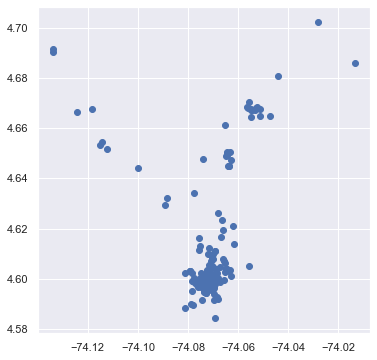

In [17]:
baseDelitos.geometry.plot(figsize=(12,6))

In [19]:
DelitosLocalidades = pd.DataFrame(baseDelitos.drop(columns=['index_right','geometry']))

In [20]:
DelitosLocalidades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177 entries, 0 to 176
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   JURISMETROPOLITANADEPTO    177 non-null    object 
 1   MUNICIPIO_HECHO            177 non-null    object 
 2   COMUNAS_ZONAS_DESCRIPCION  177 non-null    object 
 3   DESCRIPCION_CONDUCTA       177 non-null    object 
 4   BARRIOS_HECHO              177 non-null    object 
 5   FECHA_HECHO                177 non-null    object 
 6   MES_LARGO                  177 non-null    object 
 7   DIA_SEMANA                 177 non-null    object 
 8   INTERVALOS_HORA            177 non-null    object 
 9   HORA_HECHO                 177 non-null    object 
 10  GENERO                     177 non-null    object 
 11  MODALIDAD                  177 non-null    object 
 12  PAIS_PERSONA               177 non-null    object 
 13  CARGO_PERSONA              177 non-null    object 

In [21]:
DelitosLocalidades.to_csv('../Datasets Clean/DeitosLocalidades.csv',index=False)